### Importing required libraries

In [85]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

Link to Dataset: https://archive-beta.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

In [46]:
data = pd.read_csv("data.csv", delimiter =";")

In [47]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [48]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


Upon analyzing the output of the `data.describe()` function, several observations can be made regarding the dataset. The dataset contains 4424 records for various features. Each feature has its own count, mean, standard deviation, minimum value, 25th percentile, median (50th percentile), 75th percentile, and maximum value.

One of the features is "Marital status," which has a count of 4424. The mean value for this feature is approximately 1.18, with a standard deviation of around 0.61. The minimum value is 1, while the 25th percentile, median, and 75th percentile are all 1. The maximum value for marital status is 6.

Similarly, other features such as "Application mode," "Application order," "Course," "Daytime/evening attendance," "Previous qualification," "Previous qualification (grade)," "Nationality," "Mother's qualification," "Father's qualification," "Mother's occupation," and "Father's occupation" exhibit their respective statistics.

For example, "Application mode" has a mean of approximately 18.67, with a standard deviation of around 17.48. The minimum value is 1, while the 25th percentile, median, and 75th percentile are 1, 17, and 39, respectively. The maximum value for application mode is 57.

Other features, such as "Admission grade," "Displaced," "Educational special needs," "Debtor," "Tuition fees up to date," "Gender," "Scholarship holder," "Age at enrollment," "International," "Curricular units 1st sem (credited)," "Curricular units 1st sem (enrolled)," "Curricular units 1st sem (evaluations)," "Curricular units 1st sem (approved)," "Curricular units 1st sem (grade)," "Curricular units 1st sem (without evaluations)," "Curricular units 2nd sem (credited)," "Curricular units 2nd sem (enrolled)," "Curricular units 2nd sem (evaluations)," "Curricular units 2nd sem (approved)," "Curricular units 2nd sem (grade)," "Curricular units 2nd sem (without evaluations)," "Unemployment rate," "Inflation rate," and "GDP" also provide insights based on their respective statistical values.


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [50]:
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

- There are no null values in the data

In [51]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [52]:
data.shape

(4424, 37)

In [53]:
data.size

163688

### EDA

In [55]:
data['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

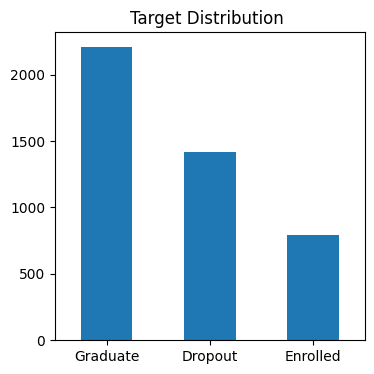

In [56]:
data["Target"].value_counts().plot(kind="bar", figsize=(4,4), title="Target Distribution ")
plt.xticks(rotation=0)
plt.show()

Considering the objective of predicting academic success, it is deemed unnecessary to utilize the ENROLLED category in our analysis. Hence, we will exclude this category from our predictive model to avoid any potential bias or irrelevant information. By removing the ENROLLED category, we can streamline our analysis and focus on the relevant variables that are more likely to contribute to the accurate prediction of academic success.

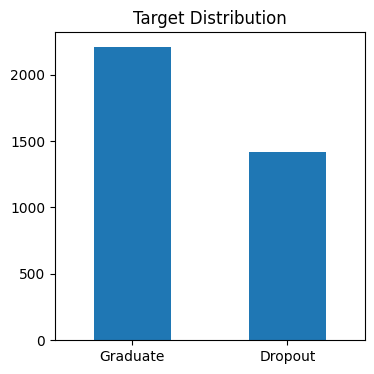

In [57]:
data = data[data['Target'] != "Enrolled"]
data["Target"].value_counts().plot(kind="bar", figsize=(4,4), title="Target Distribution")
plt.xticks(rotation=0)
plt.show()

In [58]:
data['Target'].value_counts()

Graduate    2209
Dropout     1421
Name: Target, dtype: int64

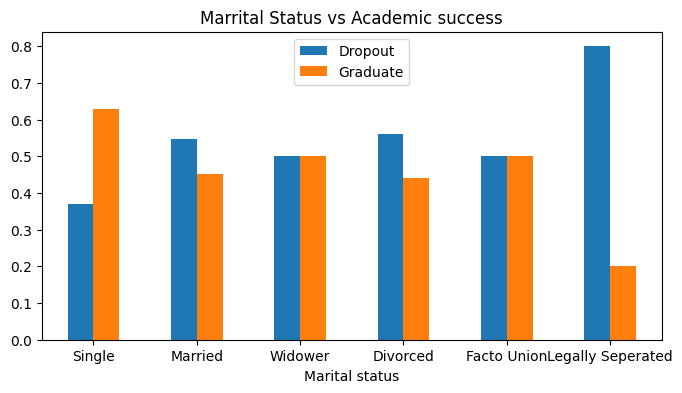

In [59]:
# Academic Progress being effected by martial status

pd.crosstab(data["Marital status"], data["Target"], normalize='index').plot(kind="bar", figsize=(8,4), title="Marrital Status vs Academic success" )
plt.xticks([0, 1, 2, 3, 4, 5], ['Single', 'Married', 'Widower', 'Divorced', 'Facto Union', 'Legally Seperated'], rotation=0)
plt.legend(loc=9)
plt.show()


Based on the analysis, it is observed that students who are legally separated are more likely to experience a higher dropout rate from the course. This could be attributed to the potential loss of focus due to personal issues associated with their marital status. Conversely, single students tend to have a greater likelihood of successfully completing the course as their attention is singularly devoted to academic pursuits. Additionally, the data reveals that married and divorced students exhibit a higher probability of dropping out from the course compared to being successfully graduated, albeit the gap between dropout and graduation rates for this group is relatively small.

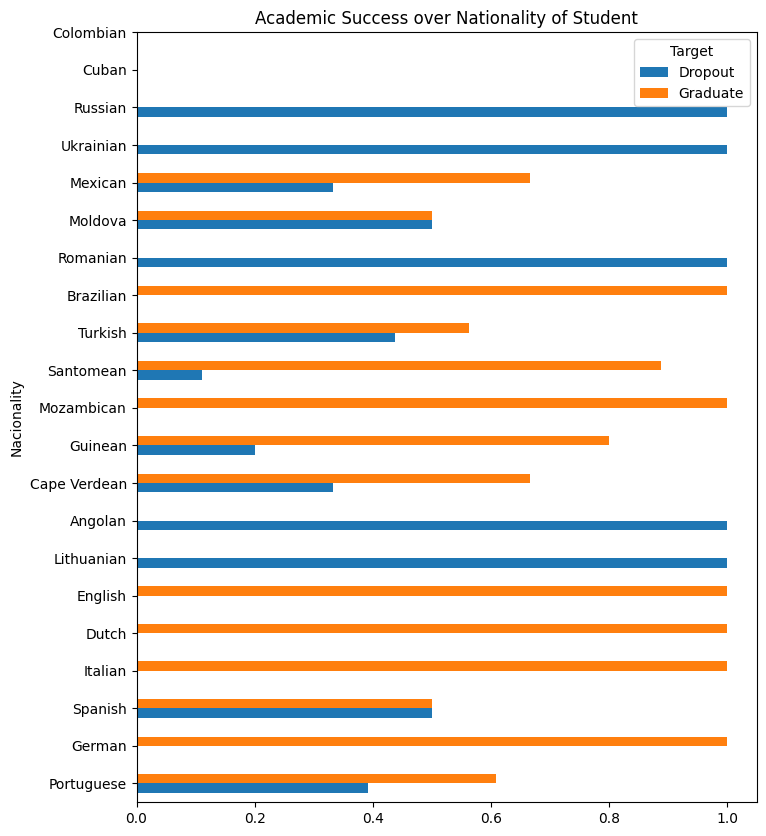

In [60]:
# Nationality Status affecting Academic Progress of student

pd.crosstab(data["Nacionality"], data["Target"], normalize='index').plot(kind="barh", figsize=(8,10), title="Academic Success over Nationality of Student")
plt.yticks(range(0,21), ['Portuguese', 'German', 'Spanish', 'Italian', 'Dutch', 'English', 'Lithuanian', 'Angolan', 'Cape Verdean', 'Guinean', 'Mozambican', 'Santomean', 'Turkish', 'Brazilian', 'Romanian', 'Moldova', 'Mexican', 'Ukrainian', 'Russian', 'Cuban', 'Colombian'])
plt.show()

<Axes: >

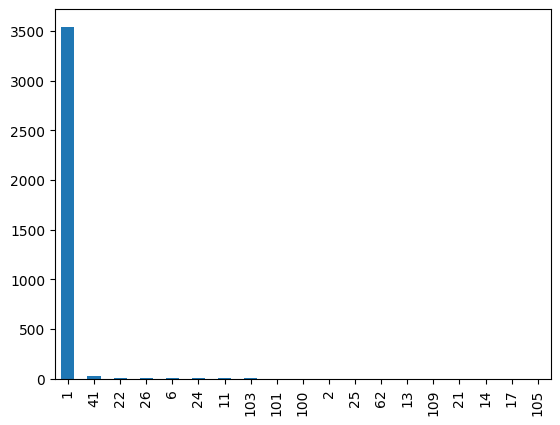

In [61]:
data["Nacionality"].value_counts().plot(kind="bar")

- This feature would not be very useful as most of the values are belonging to one class so we would be deleting this feature from the data

In [62]:
data =  data.drop('Nacionality', axis = 1)

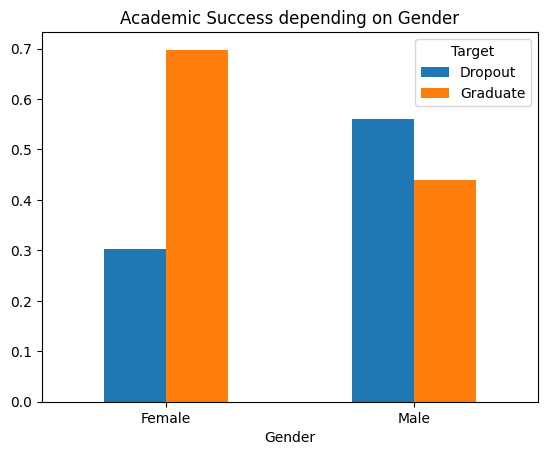

In [63]:
# lets check for Gender

pd.crosstab(data.Gender, data.Target, normalize='index').plot(kind="bar")
plt.xticks([0,1], ['Female', 'Male'], rotation=0)
plt.title("Academic Success depending on Gender")
plt.show()

In [64]:
data["Target"].unique()

array(['Dropout', 'Graduate'], dtype=object)

In [65]:
# convertinf these values to numeric
data["Target"].replace('Dropout', 0, inplace=True)
data["Target"].replace('Graduate', 1, inplace=True)

data.Target.dtype

dtype('int64')

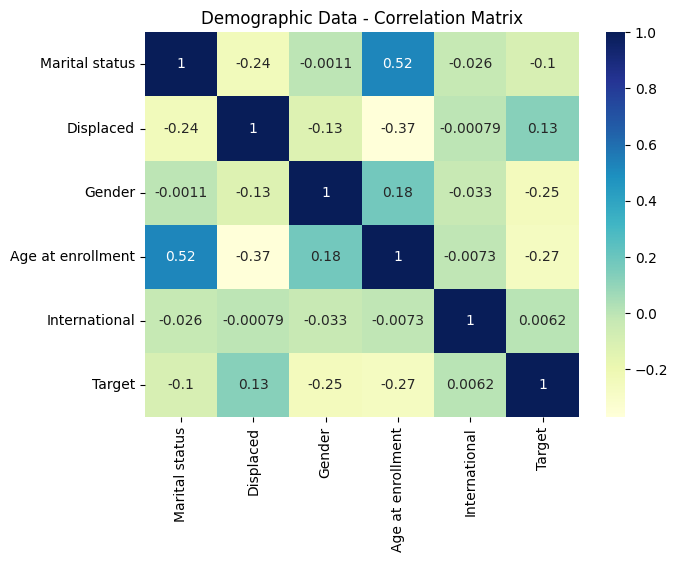

In [66]:
# As we are having more Features lets check first with Attributes Class

# Demographic Data
demo_df = data[["Marital status", "Displaced", "Gender", "Age at enrollment", "International", "Target"]]

# Socio Economic Data
sc_df = data[["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Educational special needs", "Debtor", "Tuition fees up to date", "Scholarship holder", "Target"]]

# Macro and Academic Enrollment Data
mae_df = data[['Unemployment rate', 'Inflation rate', 'GDP', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Target']]

# Academic Data
ac_df = data[['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Target']]

# Correlation Matrix for Demographic Data

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(demo_df.corr(), annot=True, cmap="YlGnBu")
plt.title("Demographic Data - Correlation Matrix")
plt.show()

Upon examination of the correlation matrix, it can be observed that Marital status has a strong positive correlation with Age at enrollment (correlation coefficient of 0.522359). This suggests that there is a tendency for individuals with higher age at enrollment to have a higher likelihood of being married.

Displaced shows a negative correlation with Marital status (correlation coefficient of -0.240544), indicating that individuals who are displaced tend to have a lower probability of being married. Furthermore, Displaced exhibits a weak positive correlation with Target (correlation coefficient of 0.126113), suggesting a slight association between displacement and the target variable.

Gender does not display a significant correlation with any of the variables, as indicated by its low correlation coefficients with Marital status (-0.001124), Displaced (-0.127896), and Target (-0.251955).

Age at enrollment exhibits a positive correlation with Marital status (correlation coefficient of 0.522359), implying that individuals who enroll at a higher age are more likely to be married. Moreover, Age at enrollment shows a negative correlation with Target (correlation coefficient of -0.267229), indicating a potential relationship between age at enrollment and the target variable.

International demonstrates a weak negative correlation with Marital status (-0.026153) and a weak positive correlation with Target (correlation coefficient of 0.006181), suggesting a minimal association between international status and these variables.

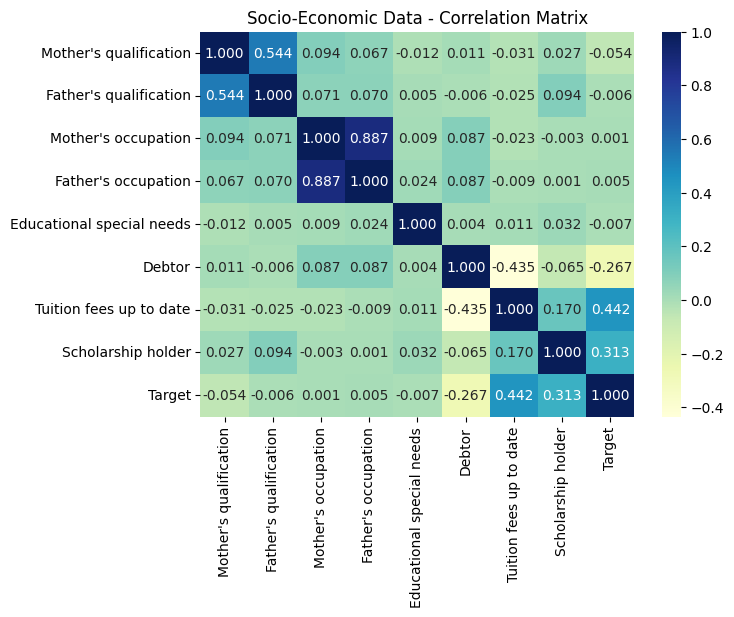

In [67]:
# Correlation Matrix for Socio-Economic Data
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(sc_df.corr(), annot=True, cmap="YlGnBu", fmt='.3f')
plt.title("Socio-Economic Data - Correlation Matrix")
plt.show()

Upon analyzing the correlation matrix, several observations can be made. The correlation coefficient ranges from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

The analysis reveals that there is a positive correlation between the qualification of the mother and the qualification of the father, as indicated by a correlation coefficient of 0.543890. Similarly, the mother's occupation and the father's occupation also exhibit a positive correlation, with a correlation coefficient of 0.886568.

Furthermore, the correlation coefficients between the mother's qualification and the father's qualification with other variables are relatively low, ranging from 0.004516 to 0.543890. This suggests that the parents' qualifications have a limited direct influence on the other variables in the dataset.

Interestingly, the presence of educational special needs shows a weak negative correlation with most variables, implying that it has a minimal impact on the other factors being considered.

Additionally, the tuition fees being up to date and being a scholarship holder exhibit moderate positive correlations with the target variable, with correlation coefficients of 0.442138 and 0.313018, respectively. This suggests that students who have their tuition fees up to date and are scholarship holders are more likely to achieve the desired target.

It is important to note that correlation does not imply causation, and further analysis is required to determine the causal relationships between variables. 

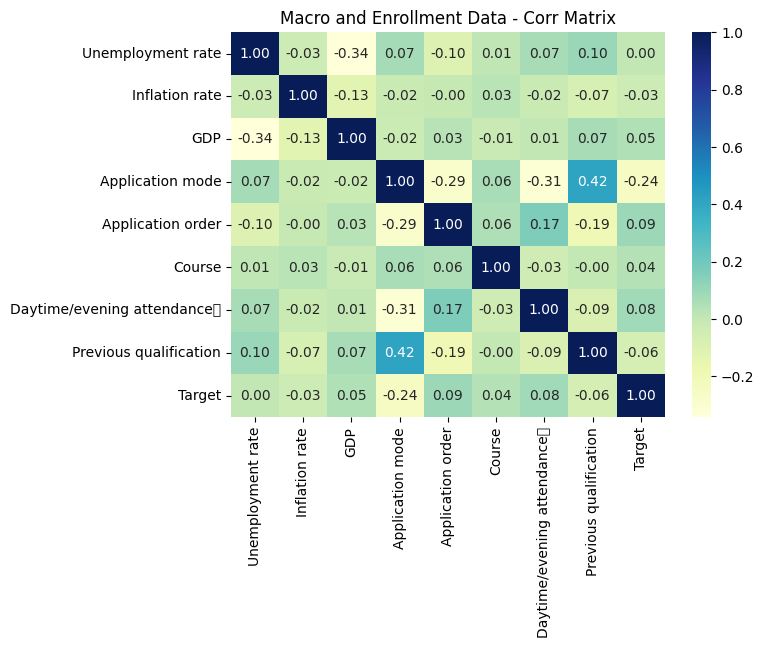

In [68]:
# Correlation Matrix for Macro and Academic enrollment Data
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(mae_df.corr(), annot=True, cmap="YlGnBu", fmt='.2f')
plt.title("Macro and Enrollment Data - Corr Matrix")
plt.show()

Examining the correlation matrix, we observe that the Unemployment rate has a negative correlation with Inflation rate (-0.029666) and GDP (-0.341742), indicating that higher unemployment rates are associated with lower inflation rates and GDP. On the other hand, there is a positive correlation between the Unemployment rate and Application mode (0.072870), suggesting that certain application modes might be preferred during periods of higher unemployment.

The Inflation rate shows a negative correlation with the Unemployment rate (-0.029666) and a weak negative correlation with Previous qualification (-0.070746), implying that higher inflation rates may coincide with lower unemployment rates and a lower level of previous qualifications among applicants.

The GDP demonstrates a negative correlation with the Unemployment rate (-0.341742), implying that higher GDP is associated with lower unemployment rates. Additionally, there is a weak positive correlation between GDP and Previous qualification (0.072121), suggesting that a higher GDP might be linked to a higher level of previous qualifications among applicants.

The Application mode exhibits a positive correlation with Application order (0.416666), indicating that the order in which applications are submitted might be related to the preferred application modes. Furthermore, there is a negative correlation between Application mode and Daytime/evening attendance (-0.310854), suggesting that certain application modes might be more common for specific attendance preferences.

Other correlations include a positive correlation between Application order and Previous qualification (0.094355) and a negative correlation between Daytime/evening attendance and Application order (-0.244507), implying certain patterns in the relationship between these variables.

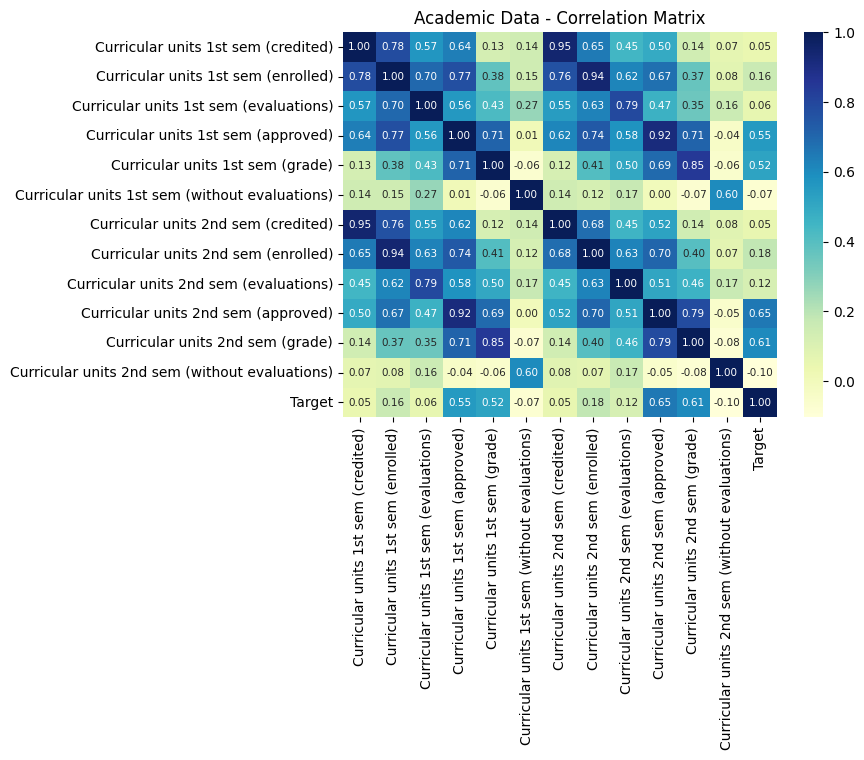

In [69]:
# Correlation Matrix for Academic Data
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(ac_df.corr(), annot=True, cmap="YlGnBu", fmt='.2f', annot_kws={"size": 7.5})
plt.title("Academic Data - Correlation Matrix")
plt.show()

Analyzing the correlation matrix, we observe various relationships among the variables. For example, the "Curricular units 1st sem (credited)" variable has a strong positive correlation with the "Curricular units 2nd sem (credited)" variable (correlation coefficient of 0.947093). This indicates that there is a high correlation between the number of credited curricular units in the first and second semesters.

Other notable correlations include a strong positive correlation between "Curricular units 1st sem (enrolled)" and "Curricular units 2nd sem (enrolled)" (correlation coefficient of 0.941286), indicating a high correlation in the number of enrolled curricular units between the two semesters.

Additionally, there are correlations between variables related to evaluations, approvals, and grades in both semesters. For example, "Curricular units 1st sem (evaluations)" and "Curricular units 2nd sem (evaluations)" have a correlation coefficient of 0.790616, suggesting a positive correlation in the number of evaluations between the two semesters.

It's important to note that the correlation coefficients for some variables are relatively low, indicating weak or no linear relationships. For instance, the correlation between "Curricular units 1st sem (credited)" and the target variable is 0.046900, suggesting a weak correlation

After careful analysis, it has been observed that certain features exhibit high correlation with the target label, specifically the data related to curricular units in the first semester. These features include "Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)", "Curricular units 1st sem (evaluation)", "Curricular units 1st sem (approved)", and "Curricular units 1st sem (grade)". The correlations of these features with the data from the second semester are 0.95, 0.94, 0.79, 0.92, and 0.85, respectively.

Given that the data from the second semester shows higher correlation with the target label, it is recommended to remove the aforementioned features related to the first semester. By doing so, we can eliminate any potential noise or redundancy in the dataset and focus on the data that is more strongly associated with our target label.

In [70]:
features_to_drop = ["Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)",
       "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (approved)", "Curricular units 1st sem (grade)",'Curricular units 2nd sem (approved)']

data =  data.drop(features_to_drop,axis=1)

In [71]:
data.shape

(3630, 30)

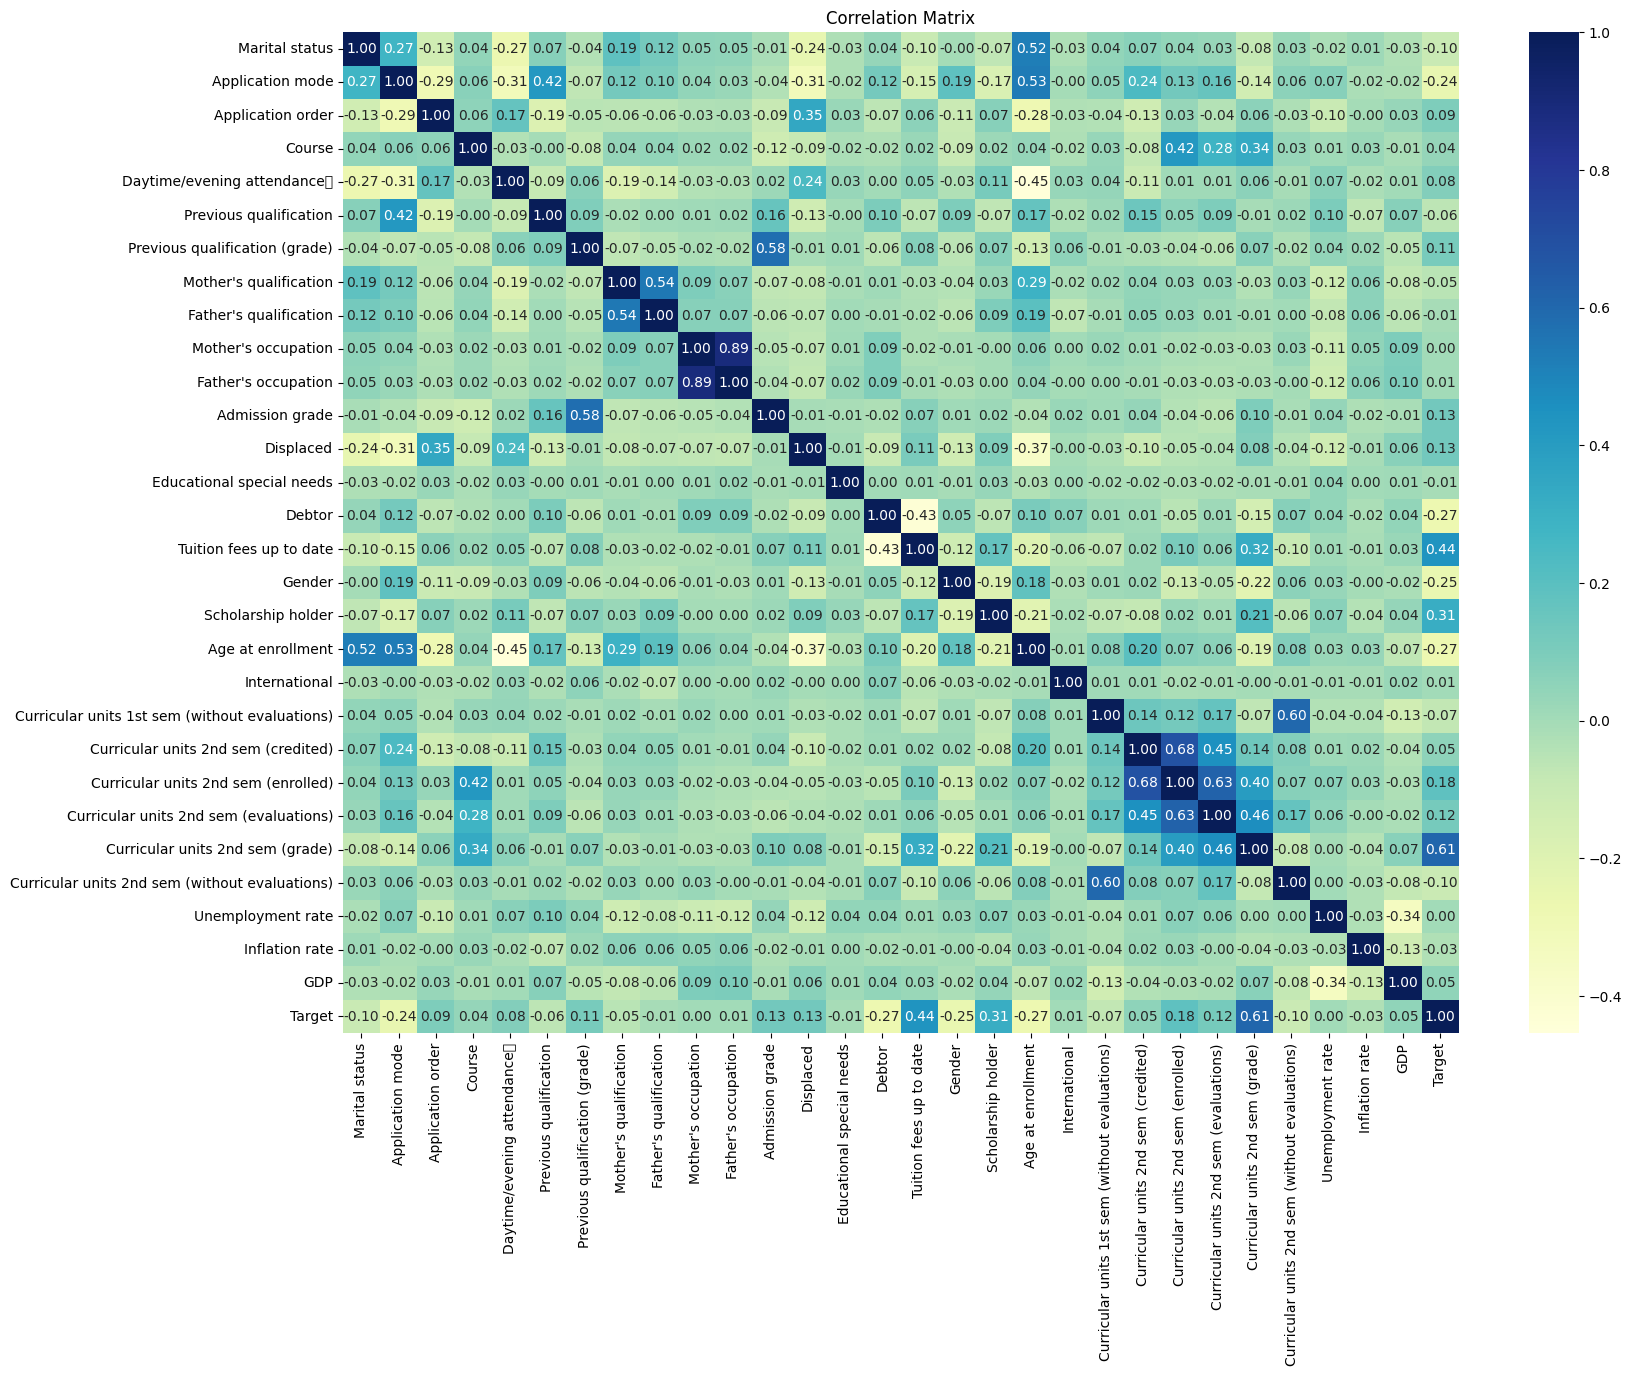

In [72]:
# Correlation Matrix for whole Data
fig, ax = plt.subplots(figsize=(18,13))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu", fmt='.2f', annot_kws={"size": 10})
plt.title("Correlation Matrix")
plt.show()

#### Feature Engineering

<b> Train-test split of data

In [74]:
# Getting Data ready for Modelling

X = data.drop("Target", axis=1)
y = data.Target

In [76]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, stratify = y)

### Modeling

Different ML algorithms can be used like Logistic Regression,
K-Nearest Neighbors,Decision Tree Classifier,
Random Forest Classifier,


In [83]:
def model_validation_and_evaluation(model_dict, X, y, cv=5):
    scoring_param = ["accuracy", "precision", "recall", "f1_micro", "f1_macro"]
    cv_score = {}  
    np.random.seed(42)
    for name, model in model_dict.items():
        cv_score[name] = {}
        for param in scoring_param:
            score = np.mean(cross_val_score(model, X, y, scoring=param, cv=cv))
            cv_score[name][param] = score 
    cv = pd.DataFrame(data=cv_score)
    return cv

In [84]:
model_dict = {"Logistc Regression" : LogisticRegression(),
              "KNN - Classifier" : KNeighborsClassifier(),
              "Random Forest Classifier" : RandomForestClassifier(),
              "Decision Tree" : DecisionTreeClassifier()}

model_validation_and_evaluation(model_dict, X, y, cv=10)

,Logistc Regression,KNN - Classifier,Random Forest Classifier,Decision Tree
accuracy,0.807438,0.730028,0.875207,0.820386
precision,0.790162,0.742515,0.865889,0.860066
recall,0.931645,0.853332,0.945681,0.854225
f1_micro,0.807438,0.730028,0.871074,0.819008
f1_macro,0.784221,0.701041,0.861449,0.810646



In the conducted analysis, four different classification algorithms were evaluated: Logistic Regression, KNN (K-Nearest Neighbors) Classifier, Random Forest Classifier, and Decision Tree. The performance of these algorithms was assessed using various metrics.

The Logistic Regression algorithm achieved an accuracy of 0.807438, indicating that it correctly classified approximately 80.74% of the instances. Its precision score was 0.790162, implying that it had a moderate ability to correctly identify positive instances. The recall score, which measures the algorithm's ability to identify all positive instances, was 0.931645. This indicates that the Logistic Regression algorithm had a high sensitivity to positive instances. The f1_micro and f1_macro scores, which provide an overall assessment of the algorithm's performance, were 0.807438 and 0.784221, respectively.

For the KNN Classifier, it achieved an accuracy of 0.730028, suggesting that its classification accuracy was relatively lower compared to the other algorithms. The precision score was 0.742515, indicating that it had a moderate ability to correctly classify positive instances. The recall score was 0.853332, showing a decent sensitivity to positive instances. The f1_micro and f1_macro scores were 0.730028 and 0.701041, respectively.

The Random Forest Classifier demonstrated better performance with an accuracy of 0.875207. It achieved a precision score of 0.865889, indicating a high ability to correctly identify positive instances. The recall score was 0.945681, demonstrating a high sensitivity to positive instances. The f1_micro and f1_macro scores were 0.871074 and 0.861449, respectively.

Lastly, the Decision Tree algorithm achieved an accuracy of 0.820386, indicating a reasonable classification accuracy. Its precision score was 0.860066, demonstrating a high ability to correctly classify positive instances. The recall score was 0.854225, suggesting a decent sensitivity to positive instances. The f1_micro and f1_macro scores were 0.819008 and 0.810646, respectively.

In summary, based on the evaluation metrics, the Random Forest Classifier exhibited the highest accuracy, precision, and recall scores among the four algorithms. It outperformed the other algorithms in terms of its ability to correctly classify positive instances and had a high sensitivity to positive instances. The Logistic Regression and Decision Tree algorithms also demonstrated reasonable performance, while the KNN Classifier had comparatively lower accuracy and precision scores.

### Hyperparameter Tuning

In [86]:
#Setting Grid For KNN
knn_grid = {'n_neighbors': range(1,10, 1),
            'leaf_size': range(20,40,1),
            'p': (1,2),
            'weights': ('uniform', 'distance'),
            'metric': ('minkowski', 'chebyshev')}

# Instantiating GridSearch CV
gs_knn = GridSearchCV(KNeighborsClassifier(),
                      param_grid=knn_grid,
                      cv=5,
                      verbose=3)

# Fitting Data in GridSearch CV Model
gs_knn.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
[CV 1/5] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=0.745 total time=   0.1s
[CV 2/5] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=0.769 total time=   0.1s
[CV 3/5] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=0.725 total time=   0.1s
[CV 4/5] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=0.756 total time=   0.1s
[CV 5/5] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=0.757 total time=   0.1s
[CV 1/5] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=distance;, score=0.744 total time=   0.1s
[CV 2/5] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=distance;, score=0.768 total time=   0.1s
[CV 3/5] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=distance;, score=0.723 total time=   0.1s
[CV 4/5] END leaf_size=26, metric=

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': range(20, 40),
                         'metric': ('minkowski', 'chebyshev'),
                         'n_neighbors': range(1, 10), 'p': (1, 2),
                         'weights': ('uniform', 'distance')},
             verbose=3)

In [87]:
gs_knn.best_params_

{'leaf_size': 20,
 'metric': 'minkowski',
 'n_neighbors': 8,
 'p': 1,
 'weights': 'uniform'}

In [89]:
knn_dict = {"Base Model" : KNeighborsClassifier(),
            "Tuned Model" : KNeighborsClassifier(n_neighbors=8, 
                                                 leaf_size=20,
                                                 metric='minkowski',
                                                 p=1,
                                                 weights='uniform')}

model_validation_and_evaluation(knn_dict, X, y, cv=10)

,Base Model,Tuned Model
accuracy,0.730028,0.766391
precision,0.742515,0.777362
recall,0.853332,0.864650
f1_micro,0.730028,0.766391
f1_macro,0.701041,0.745212


Observations from KNN model:

Upon evaluating the performance of the base model and the tuned model, notable differences can be observed across various metrics. The base model achieved an accuracy of 0.730028, while the tuned model demonstrated improved performance with an accuracy of 0.766391. This indicates that the tuned model was able to make more accurate predictions overall.

When examining precision, which measures the model's ability to correctly identify positive instances, the base model achieved a precision of 0.742515. In contrast, the tuned model exhibited enhanced precision with a value of 0.777362. This suggests that the tuned model had a higher capability to accurately classify positive instances.

In terms of recall, which measures the model's ability to identify all positive instances, the base model achieved a recall of 0.853332. The tuned model showed further improvement with a recall of 0.864650. This indicates that the tuned model had a higher success rate in capturing positive instances.

Evaluating the F1 score, which combines precision and recall into a single metric, we can observe similar patterns. The base model had an F1 score of 0.730028, while the tuned model showcased improved performance with an F1 score of 0.766391. This suggests that the tuned model achieved a better balance between precision and recall.

When considering the F1 macro score, which calculates the average F1 score across all classes, the base model achieved a value of 0.701041. In comparison, the tuned model exhibited a higher F1 macro score of 0.745212, indicating a more favorable overall performance across all classes.

It is important to note that the values provided in the observations are specific to the models being evaluated and should not be generalized without proper context and consideration of the dataset and task at hand.

In [90]:
# Setting Grid for Logistic Regression Parameters  for GridSearchCV 
lr_grid = {"solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
           "penalty" : ["none", "l1", "l2", "elasticnet"],
           "C" : np.logspace(-4, 4, 30)}

# Instantiate Grid Search CV
gs_log_reg_model = GridSearchCV(LogisticRegression(),
                                param_grid=lr_grid,
                                cv=5,
                                verbose=2)

# Fit Grid Search CV our Data
gs_log_reg_model.fit(X_train, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
[CV] END ...........C=0.0001, penalty=none, solver=newton-cg; total time=   0.8s
[CV] END ...........C=0.0001, penalty=none, solver=newton-cg; total time=   1.2s
[CV] END ...........C=0.0001, penalty=none, solver=newton-cg; total time=   1.0s
[CV] END ...........C=0.0001, penalty=none, solver=newton-cg; total time=   0.9s
[CV] END ...........C=0.0001, penalty=none, solver=newton-cg; total time=   0.5s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ...............C=0.0001, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ...........C=0.0001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.0001, penalty=none, s

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

In [91]:
gs_log_reg_model.best_params_

{'C': 1.3738237958832638, 'penalty': 'l1', 'solver': 'liblinear'}

In [92]:
log_reg_dict = {"Base Model" : LogisticRegression(),
                "Tuned Model" : LogisticRegression(penalty='l2',
                                                   solver='lbfgs',
                                                   C=17.433288221999874)}

model_validation_and_evaluation(log_reg_dict, X, y, cv=10)

,Base Model,Tuned Model
accuracy,0.807438,0.807438
precision,0.790162,0.788384
recall,0.931645,0.935265
f1_micro,0.807438,0.807438
f1_macro,0.784221,0.783515


In [93]:
# Setting Grid for Random Forest Parameters  for GridSearchCV 
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 50, 100, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [400, 500, 600]}

# Instantiate Grid Search CV
random_model = GridSearchCV(RandomForestClassifier(),
                                param_grid=random_grid,
                                cv=5,
                                verbose=2)

# Fit Grid Search CV our Data
random_model.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.7s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   2.4s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.6s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.6s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.5s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.9s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; tot

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 50, 100, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [400, 500, 600]},
             verbose=2)

In [94]:
random_model.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 600}

In [95]:
rand_model_dict = {"Base Model" : RandomForestClassifier(),
                   "Tuned Model" : RandomForestClassifier(n_estimators=600,
                                                          min_samples_leaf=1,
                                                          min_samples_split=2,
                                                          max_features='auto',
                                                          max_depth=None,
                                                          bootstrap=False)}

model_validation_and_evaluation(rand_model_dict, X, y, cv=5)

,Base Model,Tuned Model
accuracy,0.876860,0.880165
precision,0.864569,0.868605
recall,0.941598,0.944769
f1_micro,0.876309,0.879614
f1_macro,0.867774,0.870647



In the comparison between the base model and the tuned model, several observations can be made. Firstly, in terms of accuracy, the tuned model achieved a slightly higher accuracy of 0.880165 compared to the base model's accuracy of 0.876860. This indicates that the tuned model performed slightly better in correctly classifying the data.

Secondly, examining precision, which measures the proportion of correctly predicted positive instances out of the total predicted positive instances, the tuned model demonstrated a precision of 0.868605, while the base model had a precision of 0.864569. This suggests that the tuned model had a slightly higher precision, indicating its ability to minimize false positive predictions.

Furthermore, considering recall, which represents the proportion of correctly predicted positive instances out of the total actual positive instances, the tuned model achieved a recall of 0.944769, while the base model achieved a recall of 0.941598. This implies that the tuned model had a slightly higher recall, indicating its capability to capture a larger portion of actual positive instances.

Additionally, evaluating the F1 score, which combines both precision and recall into a single metric, we can observe that both the f1_micro and f1_macro scores were slightly higher for the tuned model. The f1_micro score for the tuned model was 0.879614, compared to 0.876309 for the base model. Similarly, the f1_macro score for the tuned model was 0.870647, while the base model achieved a score of 0.867774. These results suggest that the tuned model achieved a slightly better balance between precision and recall than the base model.

In summary, the tuned model exhibited slight improvements across various performance metrics compared to the base model. These enhancements in accuracy, precision, recall, and F1 scores indicate the effectiveness of the tuning process in optimizing the model's performance.

In [97]:
tuned_model_dict = {"KNN" : KNeighborsClassifier(n_neighbors=8, 
                                                 leaf_size=20,
                                                 metric='minkowski',
                                                 p=1,
                                                 weights='uniform'),
                   "Logistic Regression" : LogisticRegression(penalty='l2',
                                                              solver='lbfgs',
                                                              C=17.433288221999874),
                   "Random Forest" : RandomForestClassifier(n_estimators=600,
                                                          min_samples_leaf=1,
                                                          min_samples_split=2,
                                                          max_features='auto',
                                                          max_depth=None,
                                                          bootstrap=False)}

model_validation_and_evaluation(tuned_model_dict, X, y, cv=5)

,KNN,Logistic Regression,Random Forest
accuracy,0.764463,0.806887,0.877961
precision,0.777315,0.789488,0.868388
recall,0.859665,0.931640,0.945671
f1_micro,0.764463,0.806887,0.877961
f1_macro,0.743953,0.783488,0.869745


In a comparative analysis of three machine learning algorithms - K-Nearest Neighbors (KNN), Logistic Regression, and Random Forest - several performance metrics were evaluated. The accuracy metric measures the overall correctness of the model's predictions. Among the three algorithms, Random Forest achieved the highest accuracy of 0.877961, indicating that it made the most accurate predictions compared to KNN (0.764463) and Logistic Regression (0.806887).

Precision, a metric that quantifies the model's ability to correctly identify positive instances, was also examined. In this case, Random Forest exhibited the highest precision (0.868388), outperforming KNN (0.777315) and Logistic Regression (0.789488) in this aspect.

The recall metric, which measures the model's capability to identify all positive instances, was analyzed as well. Both Random Forest (0.945671) and Logistic Regression (0.931640) demonstrated superior recall compared to KNN (0.859665), implying that they were more effective at capturing positive instances.

F1 score, which combines precision and recall into a single metric, was evaluated using both micro and macro averaging techniques. For micro averaging, which considers overall performance across all classes, the F1 scores for KNN, Logistic Regression, and Random Forest were 0.764463, 0.806887, and 0.877961, respectively. When using macro averaging, which calculates the average F1 score for each class before aggregating, the values were 0.743953, 0.783488, and 0.869745 for KNN, Logistic Regression, and Random Forest, respectively.

In conclusion, based on the evaluation of these performance metrics, Random Forest demonstrated the highest accuracy, precision, recall, and F1 scores among the three algorithms. KNN and Logistic Regression, while achieving respectable results, fell short in various aspects compared to Random Forest.